In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/hotel_bookings.csv")

In [3]:
df.shape

(119390, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

- 488 missing in country (object) : mode
- 4 missing in children (float) : mean/median
- 16340 missing in agent (float) : mean/median
- 112593 missing in company (float) : drop (because of more missing values)

In [6]:
df = df.drop(['company'], axis=1)

In [7]:
df.shape

(119390, 31)

### Missing Values

In [8]:
median1 = df['children'].median()
median1

0.0

In [9]:
df['children'].replace(np.nan, median1, inplace = True)

In [10]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [11]:
median_agent = df['agent'].median()
median_agent

14.0

In [12]:
df['agent'].replace(np.nan, median_agent, inplace = True)

In [13]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [14]:
mode_ctr = df['country'].mode().values[0]
mode_ctr

'PRT'

In [15]:
df['country'].replace(np.nan, mode_ctr, inplace = True)

In [16]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [17]:
# check for duplicates
dup = df.duplicated()
dup.sum()

32020

In [18]:
df.drop_duplicates(inplace = True)

In [19]:
df.shape

(87370, 31)

<AxesSubplot: >

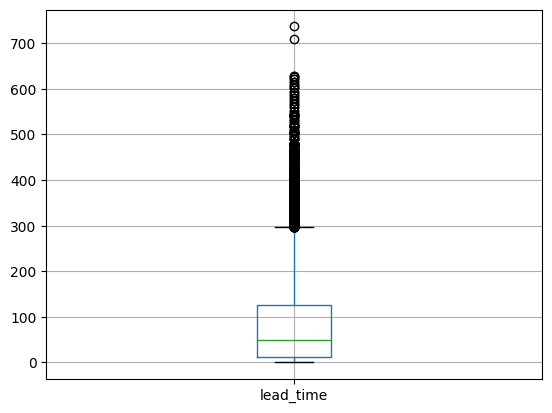

In [20]:
### Outliers
df.boxplot(column=['lead_time'])

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_range = Q1-1.5*IQR
    upper_range = Q3+1.5*IQR
    return lower_range, upper_range

In [22]:
low_lt, high_lt = remove_outlier(df['lead_time'])
df['lead_time'] = np.where(df['lead_time']>high_lt, high_lt, df['lead_time'])
df['lead_time'] = np.where(df['lead_time']<low_lt, low_lt, df['lead_time'])

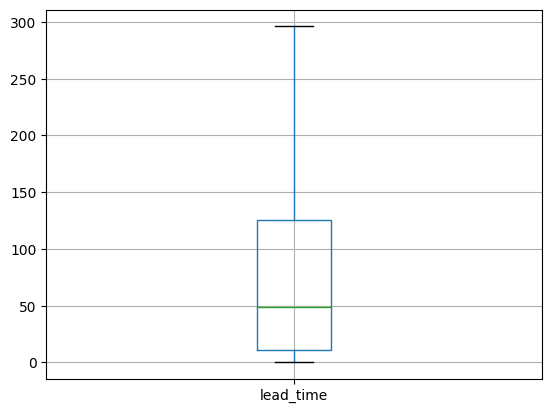

In [23]:
df.boxplot(column=['lead_time'])
plt.show()

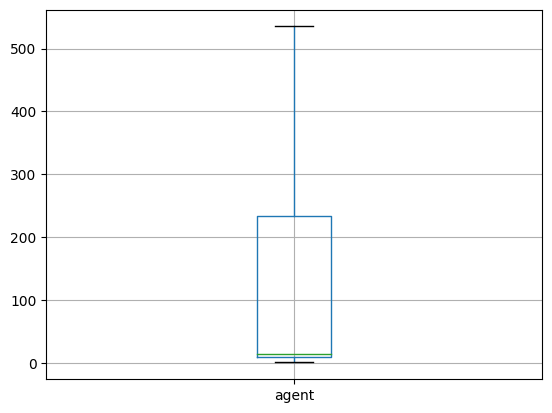

In [24]:
df.boxplot(column=['agent'])
plt.show()

In [25]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,296.0,2015,July,27,1,0,0,2,...,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,296.0,2015,July,27,1,0,0,2,...,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7.0,2015,July,27,1,0,1,1,...,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13.0,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14.0,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,07-03-2015
6,Resort Hotel,0,0.0,2015,July,27,1,0,2,2,...,0,No Deposit,14.0,0,Transient,107.0,0,0,Check-Out,07-03-2015
7,Resort Hotel,0,9.0,2015,July,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,07-03-2015
8,Resort Hotel,1,85.0,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,05-06-2015
9,Resort Hotel,1,75.0,2015,July,27,1,0,3,2,...,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,4/22/2015
10,Resort Hotel,1,23.0,2015,July,27,1,0,4,2,...,0,No Deposit,240.0,0,Transient,123.0,0,0,Canceled,6/23/2015


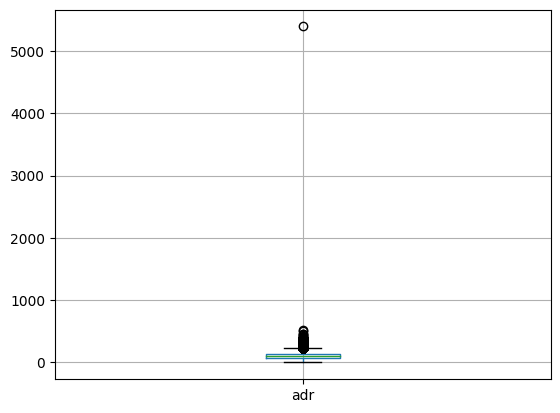

In [26]:
df.boxplot(column=['adr'])
plt.show()

In [27]:
low_adr, high_adr = remove_outlier(df['adr'])
df['adr'] = np.where(df['adr']>high_adr, high_adr, df['adr'])
df['adr'] = np.where(df['adr']<low_adr, low_adr, df['adr'])

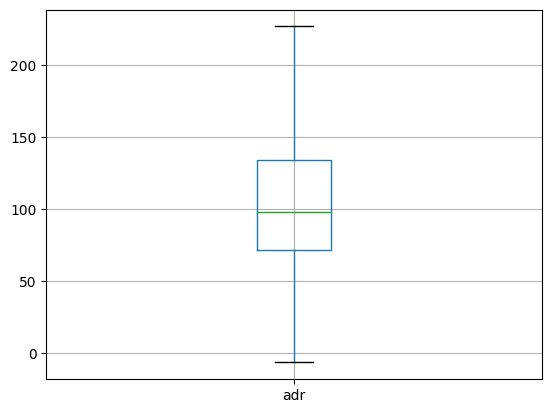

In [28]:
df.boxplot(column=['adr'])
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87370 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87370 non-null  object 
 1   is_canceled                     87370 non-null  int64  
 2   lead_time                       87370 non-null  float64
 3   arrival_date_year               87370 non-null  int64  
 4   arrival_date_month              87370 non-null  object 
 5   arrival_date_week_number        87370 non-null  int64  
 6   arrival_date_day_of_month       87370 non-null  int64  
 7   stays_in_weekend_nights         87370 non-null  int64  
 8   stays_in_week_nights            87370 non-null  int64  
 9   adults                          87370 non-null  int64  
 10  children                        87370 non-null  float64
 11  babies                          87370 non-null  int64  
 12  meal                           

In [30]:
cols = df.columns.tolist()
obj_cols = []

for col in cols:
    if df[col].dtype == 'object':
        obj_cols.append(col)

obj_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [35]:
dummies = pd.get_dummies(df[obj_cols])

In [36]:
dummies.head()

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,...,reservation_status_date_9/26/2015,reservation_status_date_9/26/2016,reservation_status_date_9/27/2015,reservation_status_date_9/27/2016,reservation_status_date_9/28/2015,reservation_status_date_9/28/2016,reservation_status_date_9/29/2015,reservation_status_date_9/29/2016,reservation_status_date_9/30/2015,reservation_status_date_9/30/2016
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df = pd.concat([df, dummies], axis = 1)

In [38]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status_date_9/26/2015,reservation_status_date_9/26/2016,reservation_status_date_9/27/2015,reservation_status_date_9/27/2016,reservation_status_date_9/28/2015,reservation_status_date_9/28/2016,reservation_status_date_9/29/2015,reservation_status_date_9/29/2016,reservation_status_date_9/30/2015,reservation_status_date_9/30/2016
0,Resort Hotel,0,296.0,2015,July,27,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,Resort Hotel,0,296.0,2015,July,27,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,Resort Hotel,0,7.0,2015,July,27,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Resort Hotel,0,13.0,2015,July,27,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Resort Hotel,0,14.0,2015,July,27,1,0,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23.0,2017,August,35,30,2,5,2,...,0,0,0,0,0,0,0,0,0,0
119386,City Hotel,0,102.0,2017,August,35,31,2,5,3,...,0,0,0,0,0,0,0,0,0,0
119387,City Hotel,0,34.0,2017,August,35,31,2,5,2,...,0,0,0,0,0,0,0,0,0,0
119388,City Hotel,0,109.0,2017,August,35,31,2,5,2,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.drop(obj_cols, axis=1, inplace = True)

In [40]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reservation_status_date_9/26/2015,reservation_status_date_9/26/2016,reservation_status_date_9/27/2015,reservation_status_date_9/27/2016,reservation_status_date_9/28/2015,reservation_status_date_9/28/2016,reservation_status_date_9/29/2015,reservation_status_date_9/29/2016,reservation_status_date_9/30/2015,reservation_status_date_9/30/2016
0,0,296.0,2015,27,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,296.0,2015,27,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,7.0,2015,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,13.0,2015,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,14.0,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23.0,2017,35,30,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119386,0,102.0,2017,35,31,2,5,3,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119387,0,34.0,2017,35,31,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119388,0,109.0,2017,35,31,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df.dtypes

is_canceled                            int64
lead_time                            float64
arrival_date_year                      int64
arrival_date_week_number               int64
arrival_date_day_of_month              int64
                                      ...   
reservation_status_date_9/28/2016      uint8
reservation_status_date_9/29/2015      uint8
reservation_status_date_9/29/2016      uint8
reservation_status_date_9/30/2015      uint8
reservation_status_date_9/30/2016      uint8
Length: 1186, dtype: object

## Practice

In [104]:
df2 = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/auto-mpg.csv")

In [105]:
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [106]:
df2.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [108]:
df2.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [109]:
df2.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [110]:
df2['horsepower'] = df2['horsepower'].replace('?', np.nan)

In [111]:
df2['horsepower'] = df2['horsepower'].astype(float)

In [112]:
df2.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [113]:
median = df2['horsepower'].median()
median

93.5

In [114]:
df2['horsepower'].replace(np.nan, median, inplace=True)

In [115]:
df2.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [116]:
df2.duplicated().sum()

0

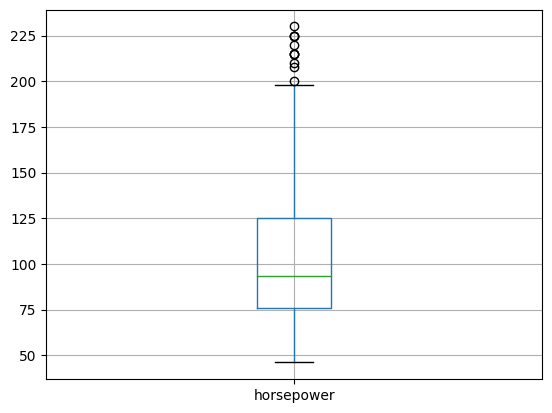

In [117]:
df2.boxplot(column=['horsepower'])
plt.show()

In [118]:
def find_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    return lower_range, upper_range

In [120]:
low_hp, high_hp = find_outlier(df2['horsepower'])

df2['horsepower'] = np.where(df2['horsepower']>high_hp, high_hp, df2['horsepower'])
df2['horsepower'] = np.where(df2['horsepower']<low_hp, low_hp, df2['horsepower'])

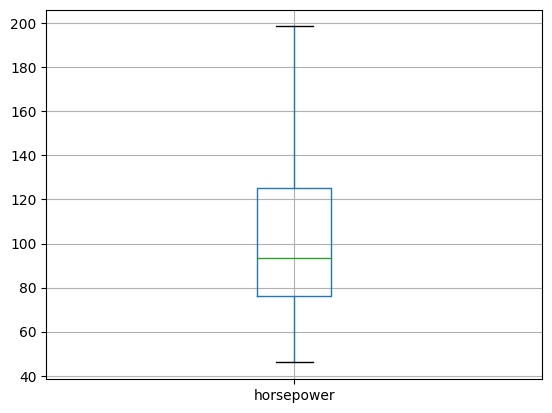

In [121]:
df2.boxplot(column=['horsepower'])
plt.show()

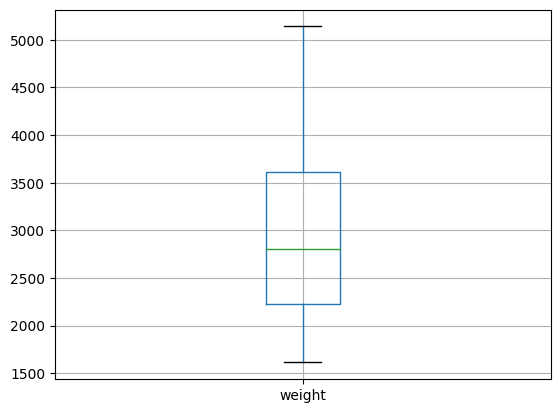

In [122]:
df2.boxplot(column=['weight'])
plt.show()

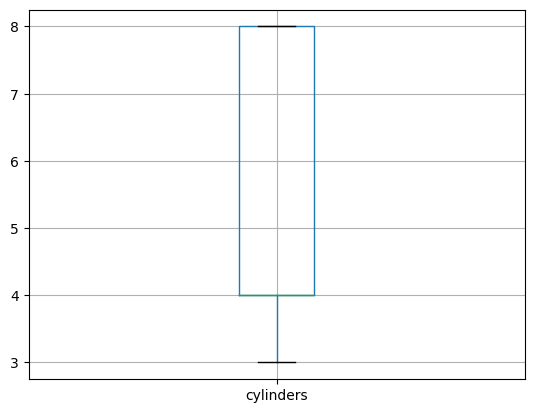

In [123]:
df2.boxplot(column=['cylinders'])
plt.show()

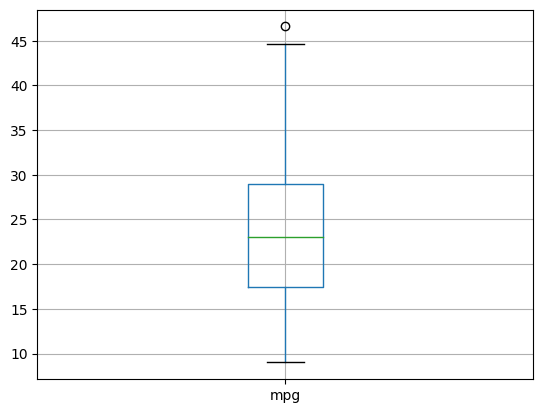

In [124]:
df2.boxplot(column=['mpg'])
plt.show()

In [125]:
low_mpg, high_mpg = find_outlier(df2['mpg'])

df2['mpg'] = np.where(df2['mpg']>high_mpg, high_mpg, df2['mpg'])
df2['mpg'] = np.where(df2['mpg']<low_mpg, low_mpg, df2['mpg'])

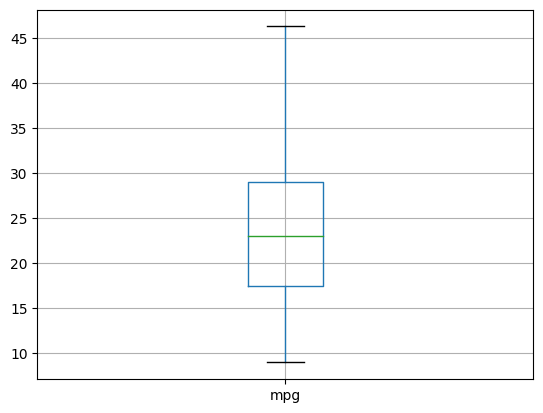

In [126]:
df2.boxplot(column=['mpg'])
plt.show()

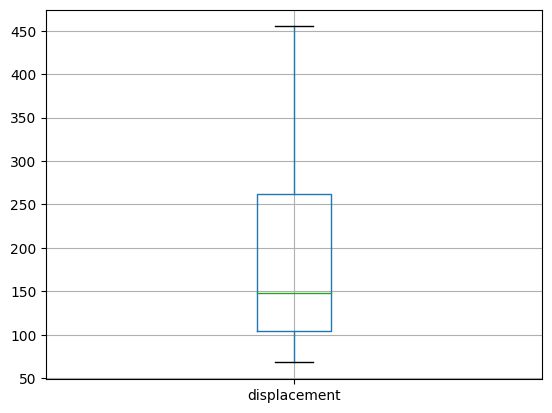

In [127]:
df2.boxplot(column=['displacement'])
plt.show()

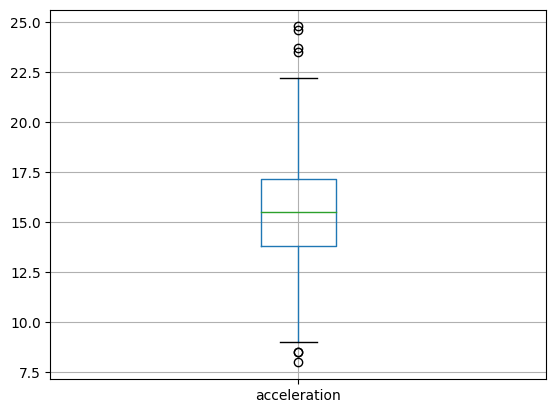

In [128]:
df2.boxplot(column=['acceleration'])
plt.show()

In [129]:
low_acceleration, high_acceleration = find_outlier(df2['acceleration'])

df2['acceleration'] = np.where(df2['acceleration']>high_acceleration, high_acceleration, df2['acceleration'])
df2['acceleration'] = np.where(df2['acceleration']<low_acceleration, low_acceleration, df2['acceleration'])

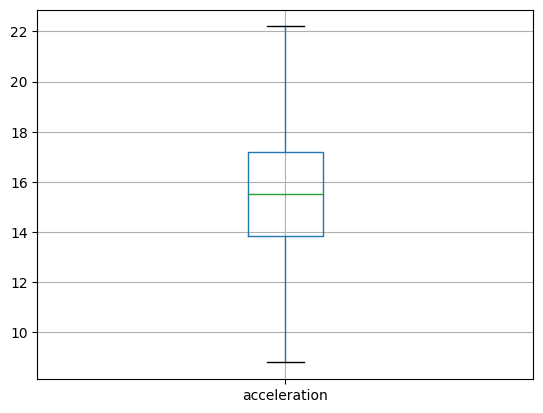

In [130]:
df2.boxplot(column=['acceleration'])
plt.show()

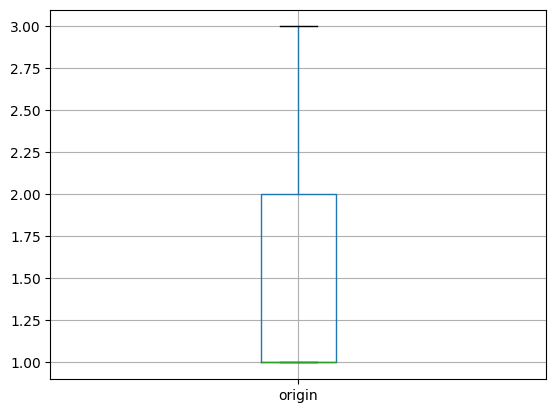

In [131]:
df2.boxplot(column=['origin'])
plt.show()

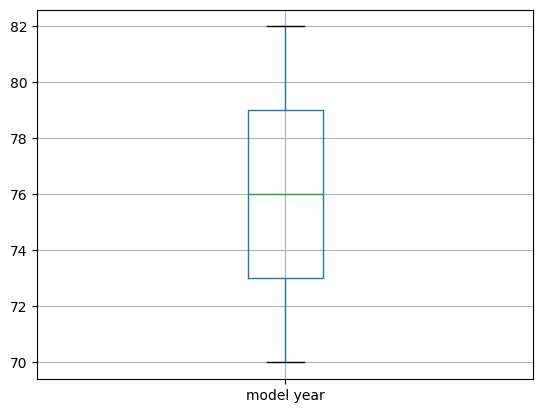

In [132]:
df2.boxplot(column=['model year'])
plt.show()

In [134]:
dummies = pd.get_dummies(df2[['car name']])
dummies

,car name_amc ambassador brougham,car name_amc ambassador dpl,car name_amc ambassador sst,car name_amc concord,car name_amc concord d/l,car name_amc concord dl,car name_amc concord dl 6,car name_amc gremlin,car name_amc hornet,car name_amc hornet sportabout (sw),...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
df2 = pd.concat([df2, dummies], axis = 1)

In [136]:
df2.drop(['car name'], axis = 1, inplace = True)

In [137]:
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name_amc ambassador brougham,car name_amc ambassador dpl,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Columns: 313 entries, mpg to car name_vw rabbit custom
dtypes: float64(4), int64(4), uint8(305)
memory usage: 143.5 KB


In [139]:
df2.dtypes

mpg                              float64
cylinders                          int64
displacement                     float64
horsepower                       float64
weight                             int64
                                  ...   
car name_vw dasher (diesel)        uint8
car name_vw pickup                 uint8
car name_vw rabbit                 uint8
car name_vw rabbit c (diesel)      uint8
car name_vw rabbit custom          uint8
Length: 313, dtype: object